In [34]:
from sympy import *
from math import e
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# define a symbol of Euler's number
Eulers = Symbol('e') 
# initialize SymPy session (configures interaction with the user)
init_session(quiet = True)

# form an equation
expression_infinity = Eq(Limit((1 + 1 / f(x))**f(x), x, oo), Eulers)
expression_infinity

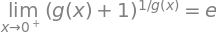

In [36]:
#form an equation
expression_zero = Eq(
    Limit((1 + g(x))**(1/g(x)), x, 0),
    Eulers
)

# enable unicode characters printing (simple format, nothing technical)
init_printing()
expression_zero

In [37]:
def infinity_approaching_symbolic() -> bool:
    """
    Proves the limit of the expression (1 + 1/x)^x as x approaches ∞ is equal to Euler's number 'e'.

    Returns:
        bool: True if the limit is equal to 'e', False otherwise.
    """

    x = symbols('x')  # here, we define the variable that will be used for calculations
    eulers_limit = Limit((1 + 1 / x) ** x, x, oo)  # define the expression, takes three parameteres:
                                                   # Limit(expression, variable, value the limit tends to)
    result = eulers_limit.doit().evalf()
    # ---> doit() method automatically manipulates the expression and applies all mathematical principles needed 
    #     to perform the calculation, thus we confidentally assume that all possible inputs will be handled 
    #    correctly
    
    # ---> evalf() converts the symbolic value into numeric one, therefore, when the doit() has performed
    #      its role and calculated the result (in our case for all inputs Euler's number must be obtained)
    #      the evalf() simply converts it to the numeric value (≈ 2.718281828459045 as well-known)
    
    
    # return 1) boolean value whether result (calculations performed) is equal to actual Euler's number
    # 2) result itself (numeric value)
    return result == e, round(result, 10)


# as x approaches 0
# note that zero_approaching() follows completely the same structure as infinity_approaching()
def zero_approaching_symbolic() -> bool:
    """
    Proves the limit of the expression (1 + x)^(1/x) as x approaches 0 is equal to Euler's number 'e'.

    Returns:
        bool: True if the limit is equal to 'e', False otherwise.
    """
    
    x = symbols('x')  
    eulers_limit = Limit((1 + x) ** (1/x), x, 0) 
    result = eulers_limit.doit().evalf()
    
    return result == e, round(result, 10)



# defined custom-exception here, nevermind, I was just testing very huge values
class GreaterThanEulers(Exception):
    """
    Custom exception class to handle values greater than Euler's number (approximately 2.71828).

    This exception is raised when a value is greater than Euler's number (not the case with current distribution)

    Attributes:
        value (float): The value that triggered the exception.
        message (str): A message describing the error, including the problematic value.
    """
    def __init__(self, value):
        self.value = value
        self.message = f"{value} is greater than Euler's number"
        super().__init__(self.message)
        
    
def infinity_approaching_numeric():
    """
    Shows that the limit for given values is close to Euler's number.

    This function iterates through a sequence of values and calculates the limit of the
    expression (1 + 1/value) ** value for each value. Prints the value of each calculation 
    unless the expcetion was triggered

    Raises:
        GreaterThanEulers: Custom exception raised when the limit exceeds Euler's number.
    """
    
    # generate a sequence
    sequence = np.arange(1, 10001)
    
    for value in sequence:  # iterate through each value
        # define the expression to calculate
        expression = Limit((1 + 1 / value) ** value, value, oo)
        # use doit() and evalf() to calculate the value
        result = expression.doit().evalf()
        
        # yet in case for some values the result is bigger
        if (result > e):
            # therefore I decided to write a custom exception just in case
            raise GreaterThanEulers(value)
            
        print(f"For value {value} the limit is {result} (\x1b[32mpassed\x1b[0m)\n")

In [38]:
print(f"Testing symbolic:\n{infinity_approaching_symbolic()}\n{zero_approaching_symbolic()}")

Testing symbolic:
(True, 2.7182818285)
(True, 2.7182818285)


In [ ]:
print(f"Testing numeric:\n{infinity_approaching_numeric()}")

In [41]:
# This line is typically used in Jupyter Notebook to display plots inline.
%matplotlib inline

# Define a function to plot graphs
def graph_drive(x: np.ndarray, y: np.ndarray, label: str, color: str) -> None:
    """
    Plot a graph given x and y data with a specified label and color.

    Parameters:
    - x: numpy.ndarray
        An array of x-axis data points.
    - y: numpy.ndarray
        An array of y-axis data points.
    - label: str
        A label for the graph.
    - color: str
        The color of the graph line.

    Returns:
    None
    """
    plt.plot(x, y, label=label, color=color)

# Define a function to plot multiple graphs
def plot_graphs() -> None:
    """
    Plot multiple graphs on the same set of axes and customize the plot.

    Parameters:
    None

    Returns:
    None
    """
    # Create an array of x-axis values from -10 to 10
    x = np.arange(-10, 11)

    # Define symbolic variables for equations
    x_symbol, y_symbol = symbols('x y')

    # Define data and equations for four different graphs
    y1 = x
    equation1 = Eq(y_symbol, x_symbol)
    equation1 = latex(equation1, mode='inline')

    y2 = -x
    equation2 = Eq(y_symbol, -x_symbol)
    equation2 = latex(equation2, mode='inline')

    y3 = x**2
    equation3 = Eq(y_symbol, x_symbol**2)
    equation3 = latex(equation3, mode='inline')

    y4 = -(x**3)
    equation4 = Eq(y_symbol, -(x_symbol**3))
    equation4 = latex(equation4, mode='inline')

    # Plot each graph with a specified color and label
    graph_drive(x, y1, equation1, color='blue')
    graph_drive(x, y2, equation2, color='green')
    graph_drive(x, y3, equation3, color='red')
    graph_drive(x, y4, equation4, color='yellow')

    # Add labels and a legend to the plot
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    # Adjust the y-axis and x-axis limits
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

    # Display the plot
    plt.show()

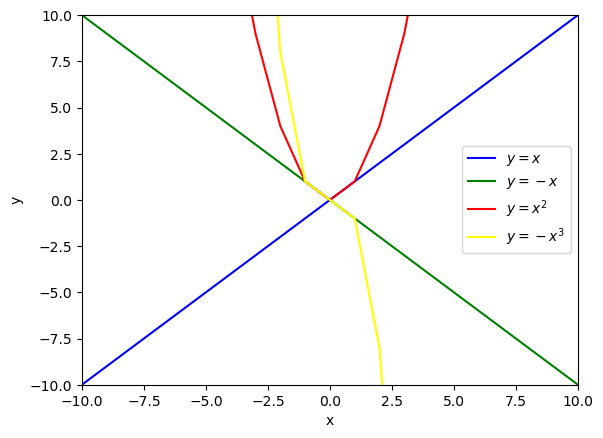

In [42]:
plot_graphs()